#### 따릉이
- 서울시 공고자전거 대여소 정보
- 서울시 공공자전거 대여소 이용정보(월별)
- 서울시 공공자전거 대여소 이용정보(시간대별)

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# warnings : 함수를 현재는 지원하나 나중에 삭제 시 경고 메세지가 발생

import warnings
warnings.simplefilter("ignore")

plt.style.use("seaborn-v0_8-whitegrid")
sns.set(rc={"figure.figsize":(10,5)})

plt.rcParams["font.family"] ="Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

##### 1.데이터 로드

In [32]:
# 대여소 정보
bike1 = pd.read_excel("./data/공공자전거 대여소 정보(2212).xlsx",skiprows=4)

# 대여소별 이용정보(월별)
bike2 = pd.read_excel("./data/서울특별시 공공자전거 대여소별 이용정보(월별)_22.7-22.12.xlsx")

# 이용정보(시간대별)
bike3 = pd.read_csv("./data/서울특별시 공공자전거 이용정보(시간대별)_22.12.csv",encoding="cp949")

##### 2.데이터 탐색

In [33]:
bike1.head(1)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07 12:03:46,20.0,NaN,LCD


In [34]:
bike2.head(1)

,자치구,대여소명,기준년월,대여건수,반납건수
0,강남구,2301. 현대고등학교 건너편,202207,2170,2183


In [35]:
bike3.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-12-01,0,746,746. 목동2단지 상가,정기권,NaN,~10대,1,13.54,0.13,570.0,3


In [36]:
# 행/열 확인

print(bike1.shape)
print(bike2.shape)
print(bike3.shape)

(2719, 10)
(16019, 5)
(1638969, 12)


In [37]:
bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2719 entries, 0 to 2718
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  2719 non-null   int64         
 1   Unnamed: 1  2719 non-null   object        
 2   Unnamed: 2  2719 non-null   object        
 3   Unnamed: 3  2719 non-null   object        
 4   Unnamed: 4  2719 non-null   float64       
 5   Unnamed: 5  2719 non-null   float64       
 6   Unnamed: 6  2719 non-null   datetime64[ns]
 7   Unnamed: 7  1200 non-null   float64       
 8   Unnamed: 8  1520 non-null   float64       
 9   Unnamed: 9  2719 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 212.6+ KB


In [38]:
bike1.describe()

,Unnamed: 0,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
count,2719.000000,2719.000000,2719.000000,2719,1200.000000,1520.000000
mean,2274.932696,37.547546,126.991597,2019-02-04 23:03:28.864654336,12.403333,11.817763
min,102.000000,37.430977,126.798599,2015-01-07 00:00:00,5.000000,3.000000
25%,978.500000,37.505438,126.915016,2017-06-13 14:54:26.500000,10.000000,10.000000
50%,2002.000000,37.546089,127.002701,2018-10-29 00:00:00,10.000000,10.000000
75%,3655.500000,37.577394,127.063728,2020-10-29 00:00:00,15.000000,14.000000
max,6053.000000,37.691013,127.180756,2022-12-23 00:00:00,46.000000,55.000000
std,1520.493874,0.052195,0.092629,NaN,4.800159,5.443257


In [39]:
bike1.describe(include=object)

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 9
count,2719,2719,2719,2719
unique,2718,25,2643,3
top,한양수자인아파트 앞,송파구,국회의사당 경내,QR
freq,2,214,7,1519


##### 3.데이터 전처리
- 결측치 처리, 컬럼명 변경, 필요없는 컬럼 정리, 데이터 타입 변경....

##### (1) bike1
- 1.컬럼명 변경

In [40]:
# 대여소번호, 대여소명, 자치구, 상세주소, 위도, 경도, 설치시기, 거치대수lcd, 거치대수qr, 운영방식
bike1.columns = ['대여소번호', '대여소명', '자치구', '상세주소', '위도', '경도', '설치시기', '거치대수lcd', '거치대수qr', '운영방식']
bike1.head(1)

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,거치대수lcd,거치대수qr,운영방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07 12:03:46,20.0,NaN,LCD


- 2. 컬럼 제거 : 상세주소, 위도, 경도

In [41]:
bike1.drop(columns=['상세주소', '위도','경도'],inplace=True)
bike1

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식
0,301,경복궁역 7번출구 앞,종로구,2015-10-07 12:03:46,20.0,NaN,LCD
1,302,경복궁역 4번출구 뒤,종로구,2015-10-07 12:04:22,NaN,12.0,QR
2,303,광화문역 1번출구 앞,종로구,2015-10-07 00:00:00,NaN,8.0,QR
3,305,종로구청 옆,종로구,2015-01-07 00:00:00,NaN,16.0,QR
4,307,서울역사박물관 앞,종로구,2015-10-07 12:09:09,NaN,11.0,QR
...,...,...,...,...,...,...,...
2714,3698,명일역 3번출구 옆,강동구,2022-06-20 00:00:00,NaN,6.0,QR
2715,3699,상일파출소 옆,강동구,2022-06-21 00:00:00,NaN,15.0,QR
2716,3700,강변그대가리버뷰 입구 맞은편,강동구,2022-07-08 00:00:00,NaN,8.0,QR
2717,3701,방아삼거리,강동구,2022-10-12 00:00:00,NaN,8.0,QR


- 3. NaN 처리 : 0 으로 채우기

In [42]:
bike1.isna().sum()

대여소번호         0
대여소명          0
자치구           0
설치시기          0
거치대수lcd    1519
거치대수qr     1199
운영방식          0
dtype: int64

In [43]:
# fillna()

bike1['거치대수lcd'].fillna(0,inplace=True)
bike1['거치대수qr'].fillna(0,inplace=True)

In [44]:
bike1.isna().sum()

대여소번호      0
대여소명       0
자치구        0
설치시기       0
거치대수lcd    0
거치대수qr     0
운영방식       0
dtype: int64

- 4.데이터 타입 변경 : astype(변경할타입), pd.to_~~~

In [45]:
bike1['대여소번호'].dtypes

dtype('int64')

In [46]:
bike1['대여소번호'] = bike1['대여소번호'].astype(object)

In [47]:
bike1['대여소번호'].dtype

dtype('O')

#### (2) bike2
- 1. 대여소명에 있는 숫자랑 문자랑 분리

In [48]:
bike2.head(2)

,자치구,대여소명,기준년월,대여건수,반납건수
0,강남구,2301. 현대고등학교 건너편,202207,2170,2183
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202207,1140,1143


In [49]:
# bike2['대여소명'].dtype

bike2['대여소번호'] = bike2['대여소명'].str.split(".",expand=True)[0]
bike2['대여소명_new'] = bike2['대여소명'].str.split(".",expand=True)[1]

In [50]:
bike2.head(1)

,자치구,대여소명,기준년월,대여건수,반납건수,대여소번호,대여소명_new
0,강남구,2301. 현대고등학교 건너편,202207,2170,2183,2301,현대고등학교 건너편


In [51]:
bike2[bike2['대여소명_new'].isnull()]

,자치구,대여소명,기준년월,대여건수,반납건수,대여소번호,대여소명_new


#### (3) bike3
- 1. 대여소명에서 숫자 제거

In [52]:
bike3.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-12-01,0,746,746. 목동2단지 상가,정기권,NaN,~10대,1,13.54,0.13,570.0,3


In [53]:
bike3['대여소명_new'] = bike3['대여소명'].str.split(".",expand=True)[1]

In [54]:
bike3.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),대여소명_new
0,2022-12-01,0,746,746. 목동2단지 상가,정기권,NaN,~10대,1,13.54,0.13,570.0,3,목동2단지 상가


- 2. 성별

In [55]:
bike3['성별'].unique()

array([nan, 'F', 'M', 'm', 'f'], dtype=object)

In [56]:
bike3['성별'].value_counts()

성별
M    726453
F    385920
m       292
f        52
Name: count, dtype: int64

In [57]:
# m => M, f => F 변경
# loc[index이름, 컬럼명] = "M"

bike3.query("성별 == 'm'").index

Index([    867,    1649,    3403,    5721,    7897,   13671,   14049,   33324,
         33718,   36315,
       ...
       1612807, 1616024, 1616034, 1618722, 1621076, 1621570, 1624521, 1631853,
       1637470, 1638826],
      dtype='int64', length=292)

In [58]:
bike3.loc[bike3.query("성별 == 'm'").index,"성별"] = "M"
bike3.loc[bike3.query("성별 == 'f'").index,"성별"] = "F"

In [59]:
bike3["성별"].unique()

array([nan, 'F', 'M'], dtype=object)

In [60]:
bike3["성별"].isnull().sum()

526252

- 3. 타입변환 : 대여일자,운동량, 탄소량

In [61]:
bike3.dtypes

대여일자         object
대여시간          int64
대여소번호         int64
대여소명         object
대여구분코드       object
성별           object
연령대코드        object
이용건수          int64
운동량          object
탄소량          object
이동거리(M)     float64
이용시간(분)       int64
대여소명_new     object
dtype: object

In [ ]:
# bike3["운동량"].astype("float64")       # ValueError: could not convert string to float: '\\N'
# pd.to_numeric(bike3["운동량"])             # # ValueError: Unable to parse string "\N"

In [66]:
# \N 데이터 확인
bike3.loc[bike3["운동량"] == r'\N']

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),대여소명_new
94,2022-12-01,0,4515,4515. 동문굿모닝탑,정기권,NaN,20대,1,\N,\N,0.0,8,동문굿모닝탑
763,2022-12-01,0,4820,4820. 망우역 2번 출구,정기권,M,60대,1,\N,\N,0.0,60,망우역 2번 출구
866,2022-12-01,0,2293,2293. SPC 앞,일일권,M,20대,1,\N,\N,0.0,10,SPC 앞
1077,2022-12-01,0,4578,4578.보라매sk뷰,정기권,M,20대,1,\N,\N,0.0,15,보라매sk뷰
1424,2022-12-01,1,1192,1192. 마곡수명산파크 209동 건너편,정기권,NaN,기타,1,\N,\N,0.0,10,마곡수명산파크 209동 건너편
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637059,2022-12-31,22,5851,5851. 도림천 건널목 위,일일권,F,20대,1,\N,\N,0.0,20,도림천 건널목 위
1637140,2022-12-31,22,550,550. 서울시설공단 앞,일일권,M,20대,1,\N,\N,0.0,54,서울시설공단 앞
1638552,2022-12-31,23,4785,4785. 롯데시티호텔,일일권,M,20대,1,\N,\N,0.0,60,롯데시티호텔
1638669,2022-12-31,23,2306,2306. 압구정역 2번 출구 옆,일일권,F,30대,1,\N,\N,0.0,118,압구정역 2번 출구 옆


In [67]:
bike3.loc[(bike3["운동량"] == r'\N'),"운동량"] = -1
bike3.loc[(bike3["탄소량"] == r'\N'),"탄소량"] = -1

In [86]:
bike3["운동량"]= bike3["운동량"].astype("float64")
bike3["탄소량"]= bike3["탄소량"].astype("float64")

In [87]:
bike3["운동량"].dtypes

dtype('float64')

In [88]:
# 대여일자 object => datetime 변경

bike3["대여일자"] = pd.to_datetime(bike3["대여일자"])

In [89]:
print(bike3["대여일자"].dtypes)

datetime64[ns]


##### 4. 데이터분석
- 이동거리/평균 사용 시간이 높은 대여소는?
- 운돌량과 이동거리의 상관관계는?
- 따릉이를 가장 많이 이용하는 성별은?
- 서울시 구별 거치대의 개수는?
- 서울시 구로별 거치대의 개수와 대여건수는?

In [90]:
bike3.head(2)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),대여소명_new
0,2022-12-01,0,746,746. 목동2단지 상가,정기권,NaN,~10대,1,13.54,0.13,570.00,3,목동2단지 상가
1,2022-12-01,0,1653,1653. 노원역1번출구,정기권,NaN,~10대,1,32.81,0.36,1534.33,12,노원역1번출구


In [91]:
# 대여소명_new 를 기준으로 이동거리(평균)가 가장 큰 순서대로 대여소명 추출
# groupby

bike3.groupby("대여소명_new")["이동거리(M)"].mean().reset_index().sort_values("이동거리(M)",ascending=False)

# 대여소명_new, 이동거리

,대여소명_new,이동거리(M)
615,동작역 5번출구 동작주차공원,6857.403043
1497,여의도중학교 옆,6812.727628
2561,옛골 입구,6800.084000
1441,압구정나들목,6581.370369
565,독산보도육교 앞 자전거 보관소,6474.211608
...,...,...
701,마곡역 교차로(2번출구),1010.258902
1906,진관동 은빛초등학교,982.127201
703,마곡역1번출구,981.727121
2625,천왕이펜하우스3단지 앞,937.106186


In [92]:
# 대여소명_new 를 기준으로 이용시간(평균)가 가장 큰 순서대로 대여소명 추출

bike3.groupby("대여소명_new")["이용시간(분)"].mean().reset_index().sort_values("이용시간(분)",ascending=False)

,대여소명_new,이용시간(분)
2435,서울숲 공영주차장앞,56.938144
1431,안골마을입구,55.150000
818,문정·가락 대여소 앞,54.687500
1497,여의도중학교 옆,52.875000
1119,서울숲 관리사무소,46.863057
...,...,...
377,기자촌 사거리,9.050000
690,마곡동 767-6,8.890613
701,마곡역 교차로(2번출구),8.665695
1702,은평뉴타운 상림마을 13단지,8.530120


Text(0.5, 1.0, '이동거리에 따른 운동량(연령대별)')

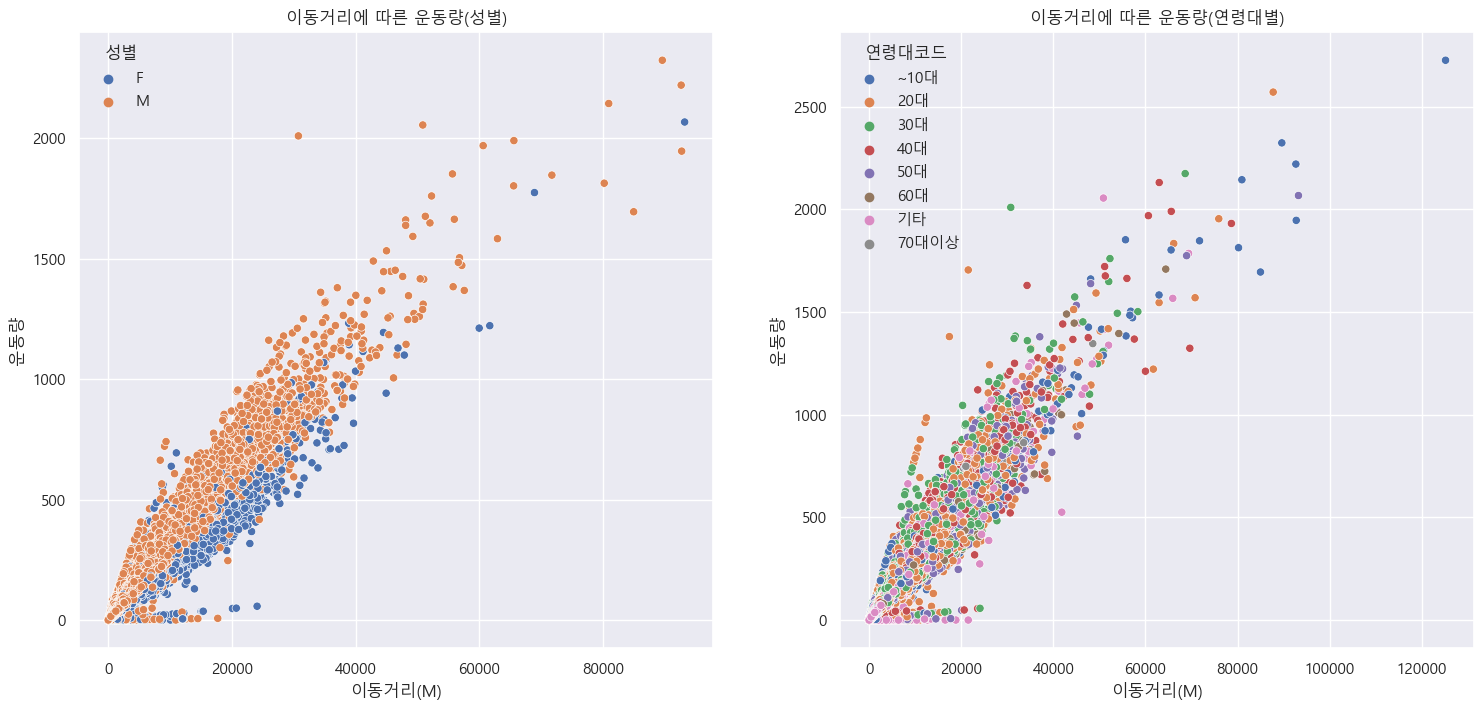

In [93]:
# 운동량과 이동거리의 상관관계 시각화

f, ax = plt.subplots(1,2, figsize=(18,8))

# 첫번째 차트
sns.scatterplot(x="이동거리(M)", y="운동량", data=bike3, ax=ax[0], hue="성별")
ax[0].set_title('이동거리에 따른 운동량(성별)')

# 두번째 차트
sns.scatterplot(x="이동거리(M)", y="운동량", data=bike3, ax=ax[1], hue="연령대코드")
ax[1].set_title('이동거리에 따른 운동량(연령대별)')


In [94]:
# 대여일자 데이터를 대여년, 대여월, 대여일 나누기

bike3["대여년"] = bike3["대여일자"].dt.year
bike3["대여월"] = bike3["대여일자"].dt.month
bike3["대여일"] = bike3["대여일자"].dt.day

In [95]:
bike3.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),대여소명_new,대여년,대여월,대여일
0,2022-12-01,0,746,746. 목동2단지 상가,정기권,NaN,~10대,1,13.54,0.13,570.0,3,목동2단지 상가,2022,12,1


In [97]:
# 성별에 따른 사용시간 합계를 대여일별로 집계하기

bike_fm = bike3.pivot_table(index="대여일",columns="성별", values="이용시간(분)",aggfunc=sum)
bike_fm

성별,F,M
대여일,,
1,319333,503339
2,375469,609480
3,261146,495368
4,189062,363039
5,339709,550568
6,363536,600414
7,462197,725353
8,471150,760041
9,473113,795379


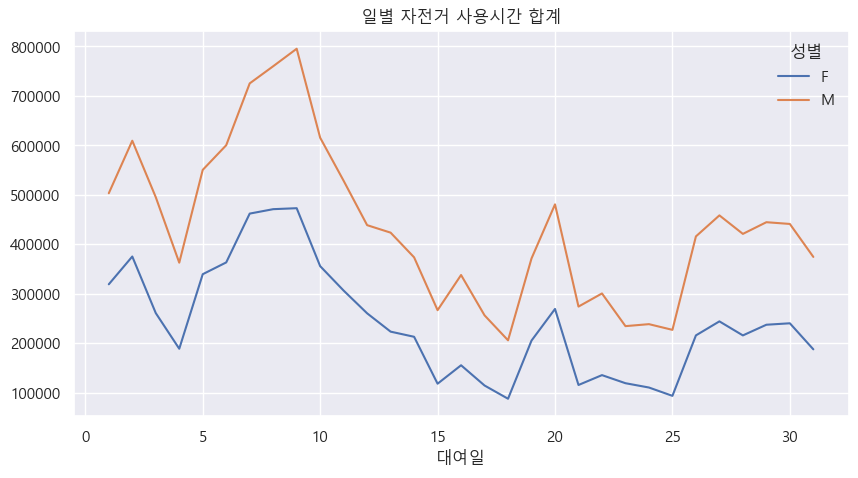

In [99]:
bike_fm.plot(title="일별 자전거 사용시간 합계");